# Jupyter Notebook example - PyTorch

**What is this?**
For now here I'll show-case how the most important parts work in PyTorch -  creating a tensor, creating a model, training a model, setting up a dataset. At the bottom of this notebook you'll find a link to a complete Cifar10 PyTorch tutorial. I'll give you a quick overview of the different parts the Cifar10 tutorial from PyTorch is based on. 

**What this is not.**
This doesn't aims at explaining theoretical concepts or the math behind what's going on here. This is supposed to give you the chance to get your hands dirty and to understand what "learning" specifically means in Machine Learning. For theoretical background check out the listet ressources in our onboarding-section on Notion. 

Author: Nicolas Remerscheid, Github: [@NiWaRe](https://www.github.com/NiWaRe)

Import the required packages

In [1]:
import torch
from torch import nn, optim 
from torchvision import datasets, transforms
from PIL import Image # only to display our image at the end

Here we'll go through the main different operations involved in creating and training an AI model. We'll focus specifically on what is needed in the official [Cifar10 Classifier Tutorial of PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html?highlight=mnist). <br><br>
To start off: Unlike MNIST, Cifar10 is a dataset containing many small photographs of 10 different objects (airplane, bird, cat, etc.). Here we'll be focussing on creating a **Classifier** for these 10 different object types. Specifically, the tutorial showcases how to build a state-of-the-art Deep Learning Model - a Convolutional Neural Network - which takes as input a normal image and outputs what object can be seen in the image. For example, if you make a photo of your cat and input it into a model, it will likely recognize that indeed it is a cat. <br><br>
As a quick explanation: Deep Learning is a subfield of Machine Learning, and Machine Learning is a subfield of AI. Machine Learning groups all the algorithms where we don't choose to model the given data in a specific way - we don't explicitly choose the data to be based on a gaussian distribution for example (as is often done in mathematical models in physics). Rather we try to design an algorithm that learns what distribution the observed data could be coming from. In general, we try to do as few explicit assumptions about the origins of the data as possible and try to let an algorithm learn everything on its own - that's why it is called Machine "Learning". Deep Learning is a subfield of Machine Learning in which we mainly consider "Deep Neural Networks". Neural Networks are specific algorithms that are inspired by the human brain (in a very much simplified way). They are made up of so-called "neurons" (a simple mathematical function) which are grouped in so-called "layers". "Deep" Learning is called "deep" because it considers Neural Networks with many layers, i.e. which can be considered to be "deep".

In [2]:
### TENSORS ###
# In PyTorch we work with "tensors" - tensors are simply numbers 
# they are called "tensors", because you'll see later that we often use high-dimensional arrays in ML

x = torch.Tensor([1.2])
print(x)

tensor([1.2000])


In [3]:
### THE FIRST MODEL ###
# To create a Machine Learning Model we create a specific class 
# it has always this structure

class oneNeuron(nn.Module): 
    def __init__(self): 
        super(oneNeuron, self).__init__()
        # important part nr. 1 #
        # here we define what components our model should be composed of
        
        # a simple linear function: f(x) = w*x + b, w = weights, b = bias 
        # x is 3D
        self.layer1 = nn.Linear(3, 1)
        
        # a  simple non-linear function, called ReLU. f(x) = max(x, 0)
        # this is one of the most commonly used "activation" function
        self.activation = nn.ReLU()
        
    def forward(self, x): 
        # important part nr. 2 #
        # here we define how we combine the components, which we defined above, 
        # and calculate the ouput for a given input x
        
        out = self.layer1(x)
        out = self.activation(out)
        
        return out

# here we create an instance of our model 
model = oneNeuron()
model

oneNeuron(
  (layer1): Linear(in_features=3, out_features=1, bias=True)
  (activation): ReLU()
)

In [4]:
### THE FIRST AI PREDICTION ###
# Now we do our first "forward pass" - we compute the ouput of our model for input x (e.g. an image)
# later, in the tutorial, y will be the recognized class (what object can be seen on an image)
x = torch.Tensor([2.3, 4.5, 2.1])
y = model(x)
y

tensor([0.0473], grad_fn=<ReluBackward0>)

In [5]:
### THE MODEL PARAMETERS ###
# What do we want to learn? The parameters of our model: w and b 
# We call state_dict to display the "state" of our model, the existing parameters and their current value
model.state_dict()

OrderedDict([('layer1.weight', tensor([[-0.2535,  0.1859, -0.0088]])),
             ('layer1.bias', tensor([-0.1875]))])

In [6]:
### THE FIRST TRAINING ###
# To train we have to adjust our parameters based on the error we made (we rcognized a dog instead of a cat)

# We define a loss - mean squared error is very standard
loss = nn.MSELoss() 

# We define an optimizer - this is the component that mimizes the loss/does the LEARNING 
# SGD = Stochastic Gradient Descent, very popular choice 
optimizer = optim.SGD(model.parameters(), lr=0.01)

# We calculate the error we made - here we assume we wanted: f([2.3, 4.5, 2.1]) = 1 [f(x) = y]
target_y = torch.tensor([1.])
error = loss(y, target_y)

# We do a "backward pass" - we calculate the gradients, i.e. we calculate how we need to change our params
error.backward() 

# We LEARN - i.e. we update our parameters based on the error we made (using the gradients)
# learning means taking a "step" in the right direction
optimizer.step()

In [7]:
### DID WE LEARN? ###
# We check again on the "state" of the model parameters and see if they changed
model.state_dict()

OrderedDict([('layer1.weight', tensor([[-0.2097,  0.2716,  0.0312]])),
             ('layer1.bias', tensor([-0.1685]))])

After training our first single neuron in PyTorch, there is only fundamental component you need to understand to be able to do the real PyTorch tutorial. 

Files already downloaded and verified


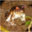

Our target, the object on the image (a number from 0-9 for 10 different objects): 
 6 = FROG


In [8]:
### DATA ###
# PyTorch has a couple of datasets which you can simply download 
# normally you would load in your data here. 
cifar10_dataset = datasets.CIFAR10(root='./data', train=True, download=True)

# behaves like an array - here we get the first element - an image of a FROG
input, target = cifar10_dataset[0]
display(input)
print(f"Our target, the object on the image (a number from 0-9 for 10 different objects): \n {target} = FROG")

# in the tutorial you'll find "transforms" - these are there to transform the data before using it 
# that could be cropping the images, etc.

## YESSS, CONGRATS, YOU JUST "TRAINED" YOUR FIRST AI !!!
Now, continue to the [Cifar10 Classifier Tutorial of PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html?highlight=mnist) or use our material list on to learn more about the theoretical basics (in the onboarding section). 